# Read ME



The [training](https://drive.google.com/file/d/1tfo6qm8zB5Eb7TY8WQGey-SqwBiC-3uO/view?usp=sharing) and [test](https://drive.google.com/file/d/1--yMo6lHVrkU9iqXUjLIJpKLYaz7QfLF/view?usp=sharing) data were downloaded from the [Zoo Galaxy](https://data.galaxyzoo.org/#section-21) platform, corresponding to Galaxy Zoo 2 ([images_gz2.zip](https://zenodo.org/records/3565489#.Y3vFKS-l0eY)).  

These data are stored in "[.pkl](https://drive.google.com/drive/folders/1XalRlt11sYmU11op2z3xPnVsRt8Pz0VM?usp=drive_link)" format instead of the original ".jpg" format to facilitate handling. The dataset consists of 10,000 training images and 5,000 test images. The information is reduced to 75 pixels per image, arranged in a 5x5 pixel grid with three color channels. To visualize the galaxy, it is necessary to reconstruct the image.

# Set up

## Packages

In [ ]:
# Mount Google Drive to access and store files
# Comment out this cell if running the script locally

from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount to ensure access


Mounted at /content/drive


In [ ]:
# Standard libraries for file handling, data manipulation, and performance tracking
import os                # Operating system utilities for file and directory management
import io                # Input/output operations (e.g., reading and writing byte streams)
import time              # For measuring execution time and performance
import math              # Mathematical functions for calculations (e.g., square roots)
import h5py              # For working with HDF5 file format (used for storing large datasets)
import random            # For random sampling and shuffling
import requests          # For making HTTP requests to download data
import numpy as np       # For numerical computations, especially with arrays and matrices
import pandas as pd      # For data manipulation and analysis (mainly with DataFrames)
import matplotlib.pyplot as plt  # For plotting and visualizing data/images

# Machine learning tools for dimensionality reduction and preprocessing
from sklearn.decomposition import IncrementalPCA  # For memory-efficient PCA, useful for large datasets
from sklearn.preprocessing import StandardScaler  # For scaling data before applying PCA (standardizing features)
import joblib                                      # For saving and loading machine learning models


In [ ]:
# Import clustering algorithms and evaluation metrics from scikit-learn

from sklearn.cluster import KMeans           # Standard K-Means clustering algorithm
from sklearn import metrics                  # Tools for evaluating clustering performance
from sklearn.cluster import MiniBatchKMeans  # Mini-batch version of K-Means for large datasets


## Funtions

In [ ]:
def load_logdata(data='train'):
    """
    Downloads and loads preprocessed training or testing log data from Google Drive.

    Parameters:
    - data (str): Specifies which log data to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded log data if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test log data
    if data.lower() == 'train':
        file_id = '1wDuS7VDzPIFEb7w_L6q1oe85ONsfEntC'  # File ID for log data train

    elif data.lower() == 'test':
        file_id = '1wAKlz1x5GZ0HbJYL90KcgVJKuDW2ZfIv'  # File ID for log data test

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = pd.read_csv(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_data(data='train'):
    """
    Downloads and loads preprocessed training or testing data from Google Drive.

    Parameters:
    - data (str): Specifies which dataset to load ('train' or 'test').

    Returns:
    - DATA (numpy array or None): The loaded dataset if successful, otherwise None.
    """

    # Define Google Drive file IDs for train and test datasets
    if data.lower() == 'train':
        file_id = '1-8JHObeY7kaU0qLt0p7WDFRJf6A6iYFN'  # File ID for training data

    elif data.lower() == 'test':
        file_id = '1bdjlyKp02O04uGkixX1E4mQMkUjvWRbL'  # File ID for test data

    else:
        print('Error: Type of data invalid')  # Handle incorrect input
        return None

    # Construct the download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Request file from Google Drive
    respuesta = requests.get(url)

    # Load the file as a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the dataset using joblib
    DATA = joblib.load(file_stream)

    # Confirm successful data loading
    print(f'{data.lower()} data loaded\nShape: {DATA.shape}')

    return DATA

def load_model(model='ipca'):
    """
    Downloads and loads a machine learning model from Google Drive.

    Parameters:
    - model (str): Specifies which model to load ('ipca' or 'scaler').

    Returns:
    - DATA (object or None): The loaded model object if successful, otherwise None.
    """

    # Define Google Drive file IDs for different models
    if model.lower() == 'ipca':
        file_id = '1s_reCv_xE5jQ_pKUtoPDsH6qPRJId_OL'  # File ID for the Incremental PCA model

    elif model.lower() == 'scaler':
        file_id = '1kl2dynGnyYr70_ChOOzQT3z1t3n7RB9w'  # File ID for the StandardScaler model

    else:
        print('Error: Invalid model type specified')  # Handle incorrect input
        return None

    # Construct the Google Drive download URL
    url = f"https://drive.google.com/uc?export=download&id={file_id}"

    # Send a request to download the model file
    respuesta = requests.get(url)

    # Convert the downloaded content into a byte stream
    file_stream = io.BytesIO(respuesta.content)

    # Load the model using joblib
    MODEL = joblib.load(file_stream)

    # Confirm successful model loading
    print(f'Model loaded: {MODEL}')

    return MODEL

def single_reconverter(data):
    """
    Takes a single PCA-transformed data point, reverses the PCA and scaling transformations,
    and normalizes it before reshaping it into an image.

    Parameters:
    - data (numpy array): A single data point in PCA-reduced form.

    Returns:
    - norm_centroides (numpy array): Reconstructed image (174x174x3).
    """
    data = data.reshape(1, -1)  # Ensure data is a 2D array
    centroides = scaler.inverse_transform(data)  # Reverse standard scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA transformation
    norm_centroides = normalized(centroides)  # Normalize pixel values
    norm_centroides = norm_centroides.reshape(174, 174, 3)  # Reshape into an image
    return norm_centroides


def reconverter(data):
    """
    Reconstructs multiple PCA-reduced data points back into images.

    Parameters:
    - data (numpy array): Multiple PCA-transformed data points.

    Returns:
    - norm_centroides (numpy array): Reconstructed images with normalized pixel values.
    """
    centroides = scaler.inverse_transform(data)  # Reverse scaling
    centroides = ipca.inverse_transform(centroides)  # Reverse PCA
    norm_centroides = normalized(centroides)  # Normalize pixel values
    return norm_centroides


def normalized(data):
    """
    Normalizes data to the range [0,1] using min-max scaling.

    Parameters:
    - data (numpy array): Input data.

    Returns:
    - norm (numpy array): Normalized data.
    """
    norm = (data - data.min()) / (data.max() - data.min())  # Min-max normalization
    return norm

def clusters_histograms(log_data, type_data):
    """
    Generates histograms showing the frequency of each galaxy class for each cluster.

    Parameters:
    - log_data (DataFrame): The dataset containing 'prediction' (cluster assignments) and 'gz2_class' (class labels).
    - type_data (str): Describes the dataset type ('Train' or 'Test') to be displayed in the plot title.

    Returns:
    - None
    """

    # Get unique cluster labels and class labels in the dataset
    clusters = log_data['prediction'].unique()
    order = sorted(log_data['gz2_class'].unique())  # Sort class labels alphabetically

    poss = 1  # Initialize subplot position counter
    plt.figure(figsize=(15, 15))  # Create a figure with a large size for multiple histograms

    # Set the overall title of the figure
    plt.suptitle(f'Histograms for each cluster ({type_data})')

    # Loop through each cluster to plot its class distribution
    for c in sorted(clusters):
        # Get the frequency of each class within the current cluster
        hismo = log_data[log_data['prediction'] == c]['gz2_class'].value_counts()

        # Reindex the histogram to ensure all class labels are present, filling missing with 0
        hismo = hismo.reindex(order, fill_value=0)

        # Create a subplot for each cluster's histogram
        plt.subplot(4, 3, poss)  # Arrange in a 4x3 grid for better visualization
        # Plot the histogram as a bar chart
        plt.bar(hismo.index, hismo)

        # Label the axes and set the title for this cluster
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.title(f'Class Frequency for Cluster {c}')

        # Add grid lines along the y-axis for better readability
        plt.grid(axis='y')

        poss += 1  # Increment the subplot position counter

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Save the histogram figure as a PDF
    plt.savefig(f'{root_result}Histograms_for_each_cluster_{type_data}.pdf')

    # Display the figure
    plt.show()

    return None

def grafica_centroides(data):

    """
    Displays the reconstructed centroids as images.

    Parameters:
    - data (numpy array): Array of reconstructed centroid images.

    Returns:
    - None
    """

    filas = math.ceil(n_clusters / 5)  # Determine number of rows dynamically
    columnas = 5  # Fixed number of columns for visualization

    #plt.figure(figsize=(2 * columnas, 2.5 * filas))  # Set figure size
    plt.figure(figsize=(12, 12))  # Set figure size

    for i in range(n_clusters):  # Loop through each cluster's centroid
        img = data[i].reshape(174, 174, 3)  # Reshape into image format

        plt.subplot(columnas, filas, i + 1)  # Define subplot
        plt.title(f'Cluster: {i}')  # Title for each centroid
        plt.imshow(img)  # Display the image
        plt.axis('off')  # Remove axis for better visualization

    # Set a global title and adjust layout
    plt.suptitle('Centroides de cada cluster')
    plt.subplots_adjust(top=0.9, wspace=0.05, hspace=0.5)
    plt.tight_layout()
    plt.savefig(f'{root_result}Centroides_K-mean.pdf')
    plt.show()

    return None



def histogram(labels, num_clusters, name):
    """
    Plots a histogram of cluster distribution with a semi-logarithmic scale.

    Parameters:
    - labels (array-like): Cluster assignments for each sample.
    - bins (int or sequence): Number of bins or bin edges for the histogram.
    - name (str): File name for saving the plot.

    Returns:
    - None
    """

    # Define bin edges for the histogram, covering all cluster indices
    bins = np.arange(0, num_clusters + 1)

    # Set up the figure size for better visualization
    plt.figure(figsize=(15, 4))

    # Set the title of the plot
    plt.title('Distribution for Each Cluster')

    # Use a semi-logarithmic scale to highlight differences in frequency
    plt.semilogy()

    # Plot a histogram showing the frequency of samples in each cluster
    frecuencia, clases, _ = plt.hist(labels, bins=bins, rwidth=0.8)

    # Label the axes
    plt.xlabel('Cluster')
    plt.ylabel('Frequency')

    # Set cluster numbers as x-axis ticks (centered between bins)
    plt.xticks(bins[:-1] + 0.5, bins[:-1])

    # Add a grid along the y-axis for better readability
    plt.grid(axis='y')

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Save the figure as a PDF file in the results directory
    plt.savefig(f'{root_result}{name}.pdf')

    # Display the plot
    plt.show()

    return None


## Directories

In [ ]:
### Drive roots ####

root_train ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/train_data.pkl'
root_test ='/content/drive/MyDrive/Practicas_Profesionales/Data/PKLs/test_data.pkl'

root_ipca = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
root_scaler = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

root_kmean = '/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/K-mean.pkl'
root_result = '/content/drive/MyDrive/Practicas_Profesionales/Results/k-mean/'

root_log_data = '/content/drive/MyDrive/Practicas_Profesionales/Data/Log_data/'

In [ ]:
# ### Local roots ####

# root_train ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/train_data.pkl'
# root_test ='/home/tonathiu/Fisica/Practicas_Profesionales/Data/test_data.pkl'

# root_ipca = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/reduce_dimensions.pkl'
# root_scaler = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/Pre-processing/scaler.pkl'

# root_kmean = '/home/tonathiu/Fisica/Practicas_Profesionales/Codes/Models/K-mean.pkl'
# root_result = '/home/tonathiu/Fisica/Practicas_Profesionales/Results/k-mean/'

## Load Models

In [ ]:
# Load models from drive

ipca = load_model('ipca')
scaler = load_model('scaler')

Model loaded: IncrementalPCA(batch_size=100, n_components=75)
Model loaded: StandardScaler()


In [ ]:
# ## Run if you have file of ipca & scaler on your computer

# ipca = joblib.load(root_ipca)
# scaler = joblib.load(root_scaler)

## Load Log Data

In [ ]:
# Load the training and testing log data from Google Drive

log_data_train = load_logdata('train')  # Load the log data for the training set
log_data_test = load_logdata('test')    # Load the log data for the testing set

train data loaded
Shape: (10000, 3)
test data loaded
Shape: (10000, 3)


# [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## Load Train Data

In [ ]:
# Load dataset from drive
train_data = load_data('train')

train data loaded
Shape: (10000, 75)


In [ ]:
# ## Run if you have datasets on your computer/Drive

# train_data = joblib.load(root_train)
# Test_data = joblib.load(root_test)

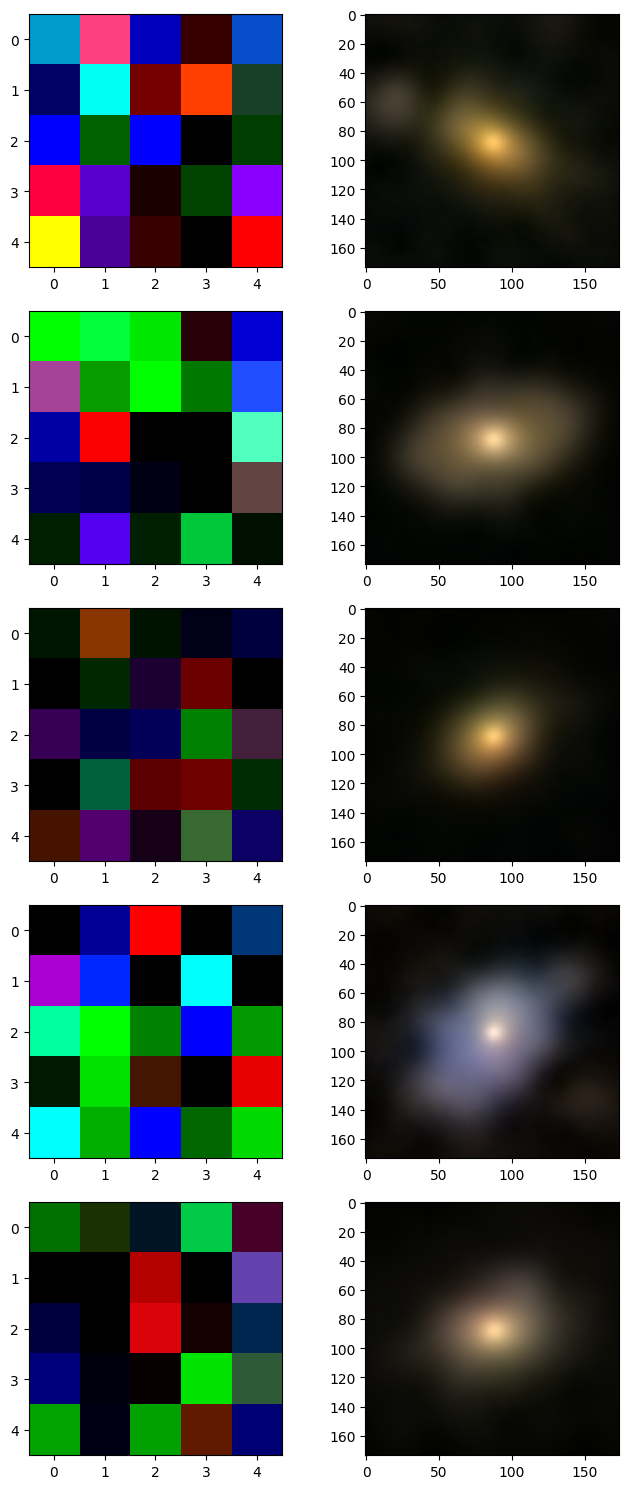

In [ ]:
# Visualize random samples from the training data in both raw and reconstructed forms

# Set the figure size for the plot (7x15)
plt.figure(figsize=(7, 15))

# Loop through 5 random samples
for i in range(5):
    # Select a random sample index
    sample = random.randint(0, len(train_data))

    # Plot the raw image (reshaped to 5x5 pixels with 3 color channels)
    plt.subplot(5, 2, 2*i + 1)  # Position in the plot
    plt.imshow(train_data[sample].reshape(5, 5, 3))  # Reshape for visualization

    # Plot the reconstructed image (using the single_reconverter function)
    plt.subplot(5, 2, 2*(i + 1))  # Position in the plot
    plt.imshow(single_reconverter(train_data[sample]))  # Reconstructed image

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the final figure
plt.show()


## Train k mean

In [ ]:
# Define the number of clusters for K-Means clustering
n_clusters = len(log_data_train['gz2_class'].unique())

# Train a MiniBatchKMeans model for clustering the PCA-transformed training data
Kmeans_model = MiniBatchKMeans(
    n_clusters = n_clusters,  # Number of clusters to identify
    batch_size = 250,         # Number of samples processed per iteration (helps with large datasets)
    random_state = 13,        # Ensures reproducibility of results
    max_iter = 500,           # Maximum number of iterations for convergence
    init = 'k-means++'        # Smart initialization to improve convergence speed
).fit(train_data)             # Fit the model on the PCA-transformed training data


## Clasification

In [ ]:
# Predict the cluster labels for the training data using the KMeans model
labels = Kmeans_model.predict(train_data)

# Add the predicted labels (cluster assignments) to the log data DataFrame
log_data_train['prediction'] = labels

# Display the first few rows of the updated DataFrame to verify the changes
log_data_train.head()


,dr7objid,asset_id,gz2_class,prediction
0,587733079744512108,253043,Ec,10
1,588295842860105844,238739,Ec,3
2,587730847961645743,274697,Ser,9
3,587732053237366856,50470,Er,1
4,587739096983076959,117625,Sb,3


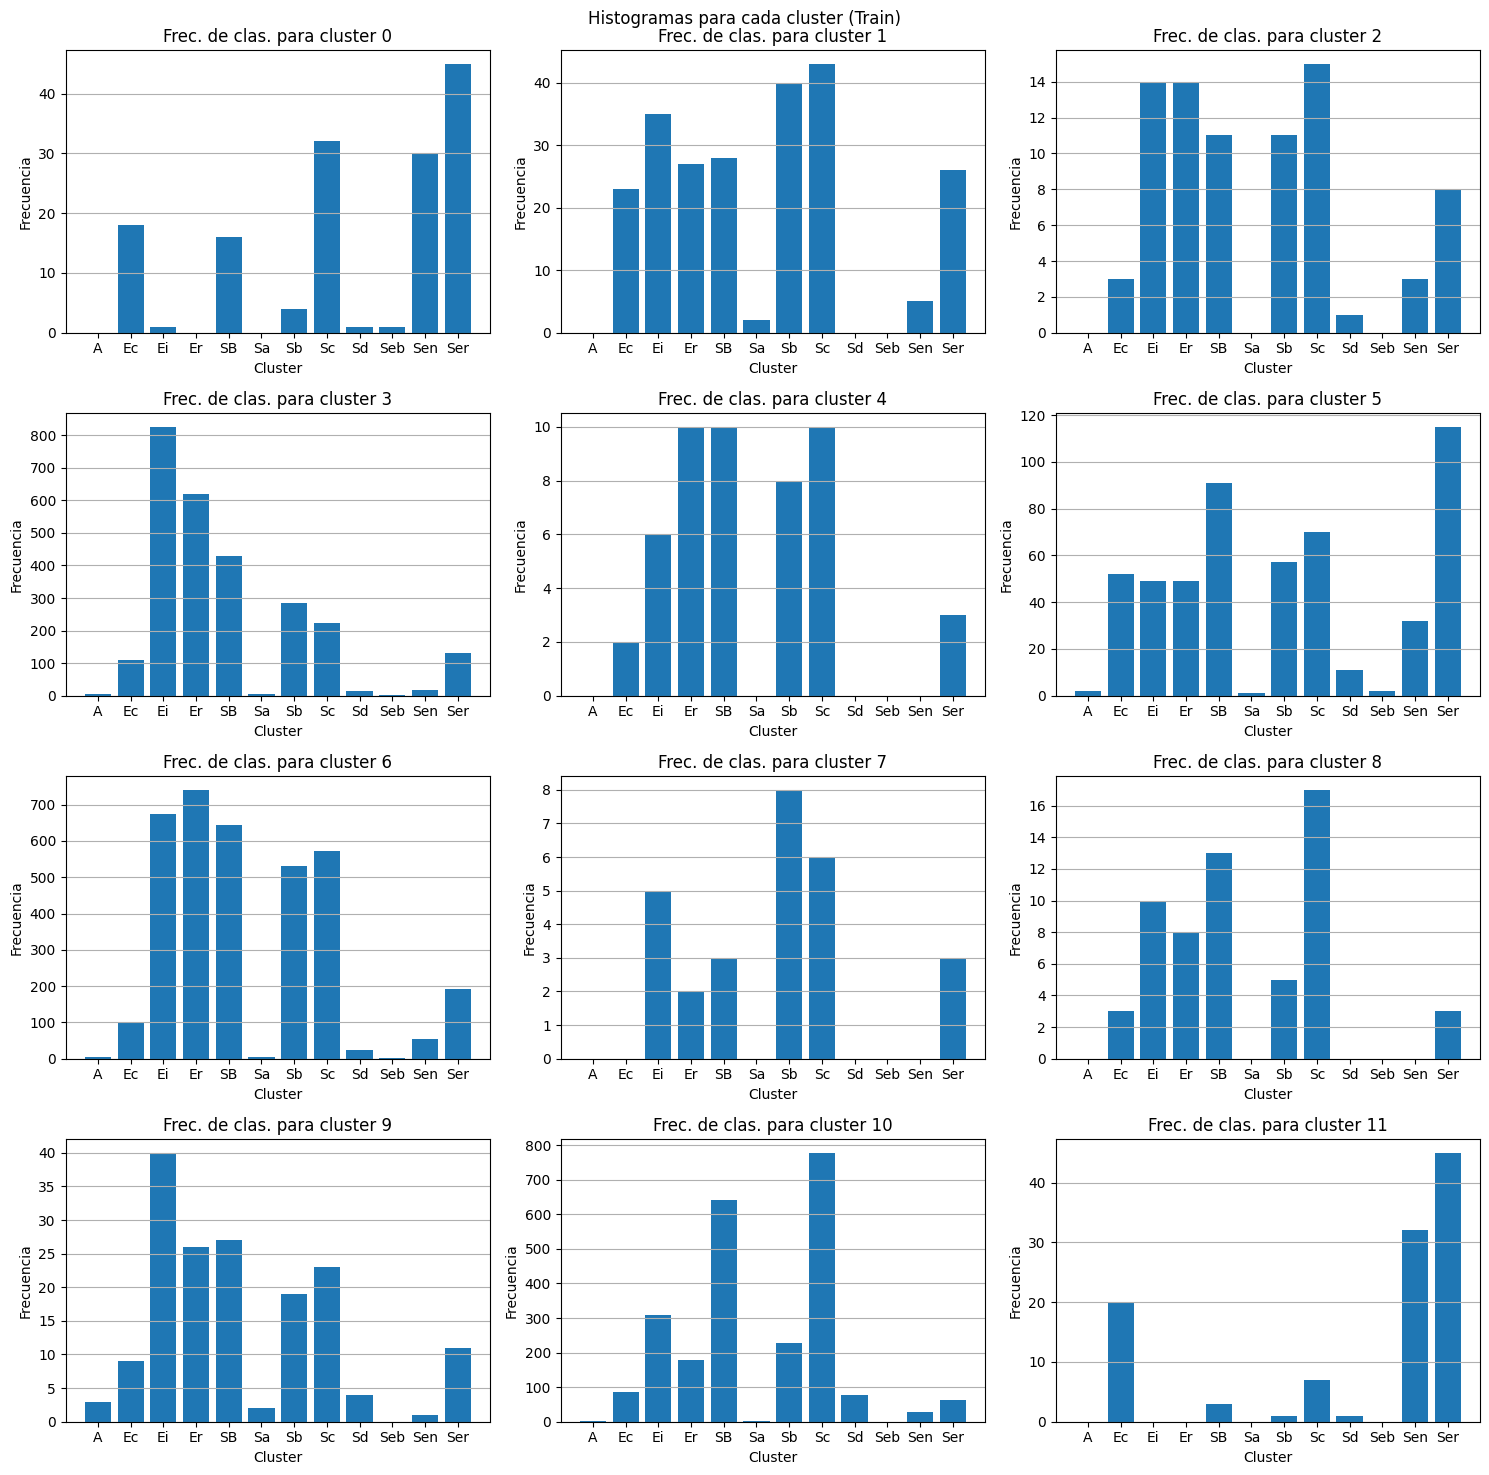

In [ ]:
# Generate histograms for each cluster showing the distribution of galaxy classes in the training dataset
clusters_histograms(log_data_train,'Train')

## Centroides

In [ ]:
# Extract the centroids from the trained K-Means model
centroides = Kmeans_model.cluster_centers_

# Convert the PCA-reduced centroids back to the original image space
centroides_normalizados = reconverter(centroides)


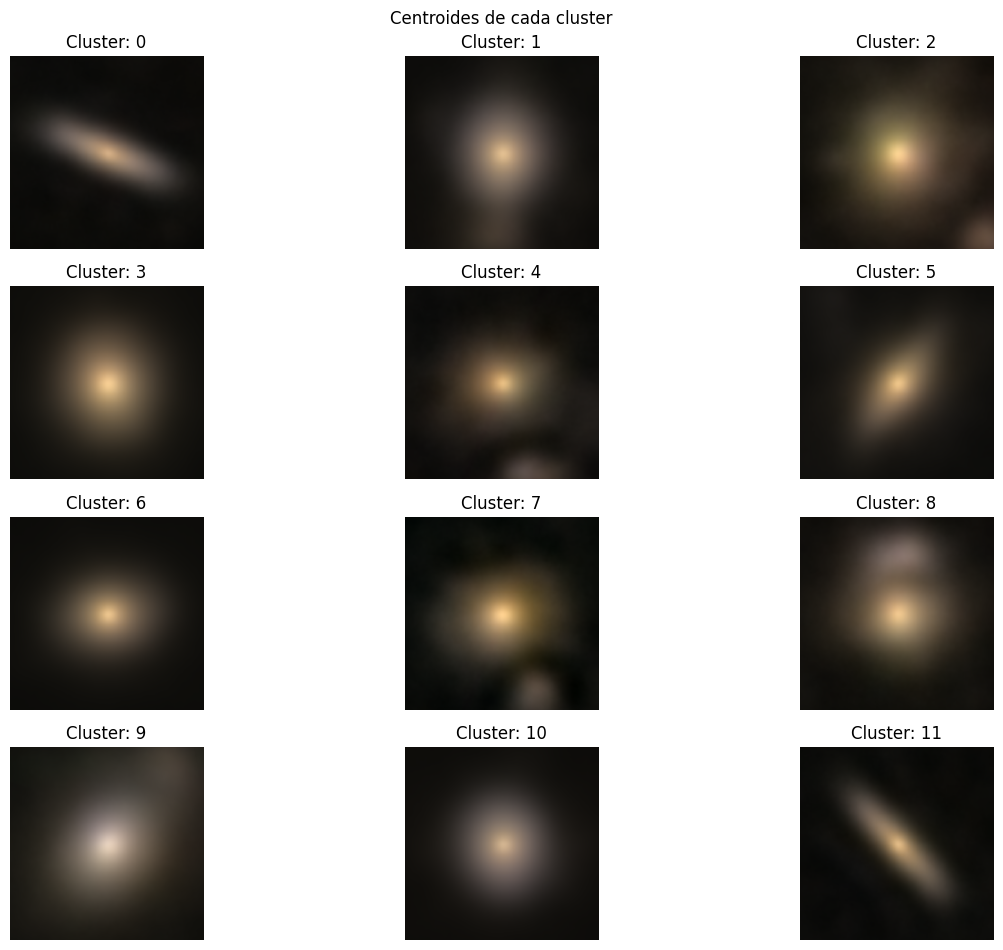

In [ ]:
# Calculate the number of unique classes in the test dataset to determine the number of clusters
n_clusters = len(log_data_test['gz2_class'].unique())

# Visualize the centroids for each cluster in the normalized space
grafica_centroides(centroides_normalizados)

## Histogram

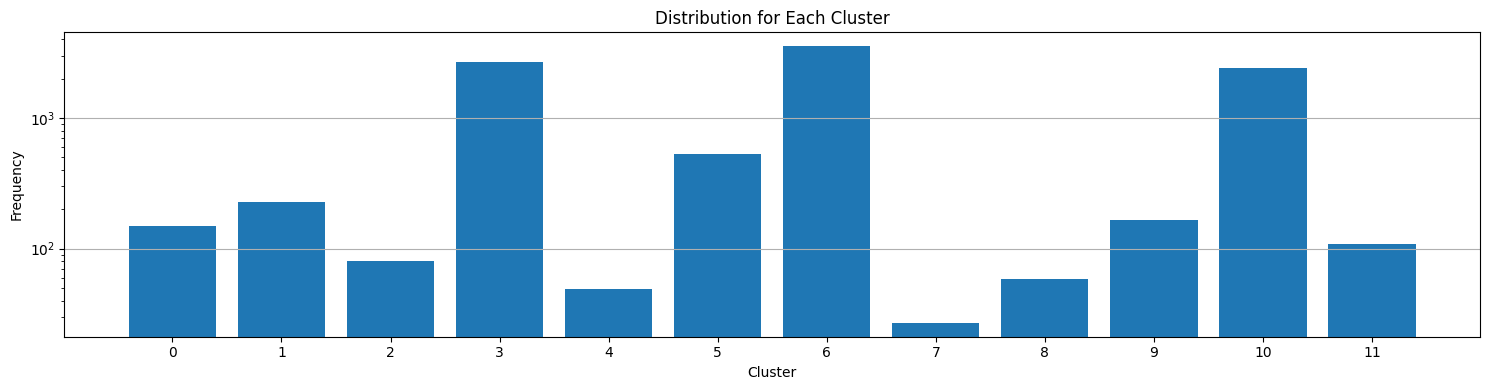

In [ ]:
# Plot and save a histogram showing the distribution of cluster labels in the training data
histogram(labels, n_clusters, 'Train_data_histograma_K-mean')

## Save

In [ ]:
# Save the trained KMeans model to a specified directory using joblib
joblib.dump(Kmeans_model,root_kmean)

['/content/drive/MyDrive/Practicas_Profesionales/Codes/Models/K-mean.pkl']

# Test K-means

## Load Test Data

In [ ]:
# Load dataset from drive

Test_data = load_data('test')
Test_data = scaler.transform(Test_data)

test data loaded
Shape: (10000, 75)


## Load k-means-Model

In [ ]:
# Load the previously saved KMeans model from drive directory
KMeans_model = joblib.load(root_kmean)

## Classification


In [ ]:
# Predict cluster labels for the test dataset using the trained K-Means model
labels = KMeans_model.predict(Test_data)

log_data_test['prediction'] = labels
log_data_test.head()


# Determine the number of unique clusters found in the test data
n_clusters = len(np.unique(labels))


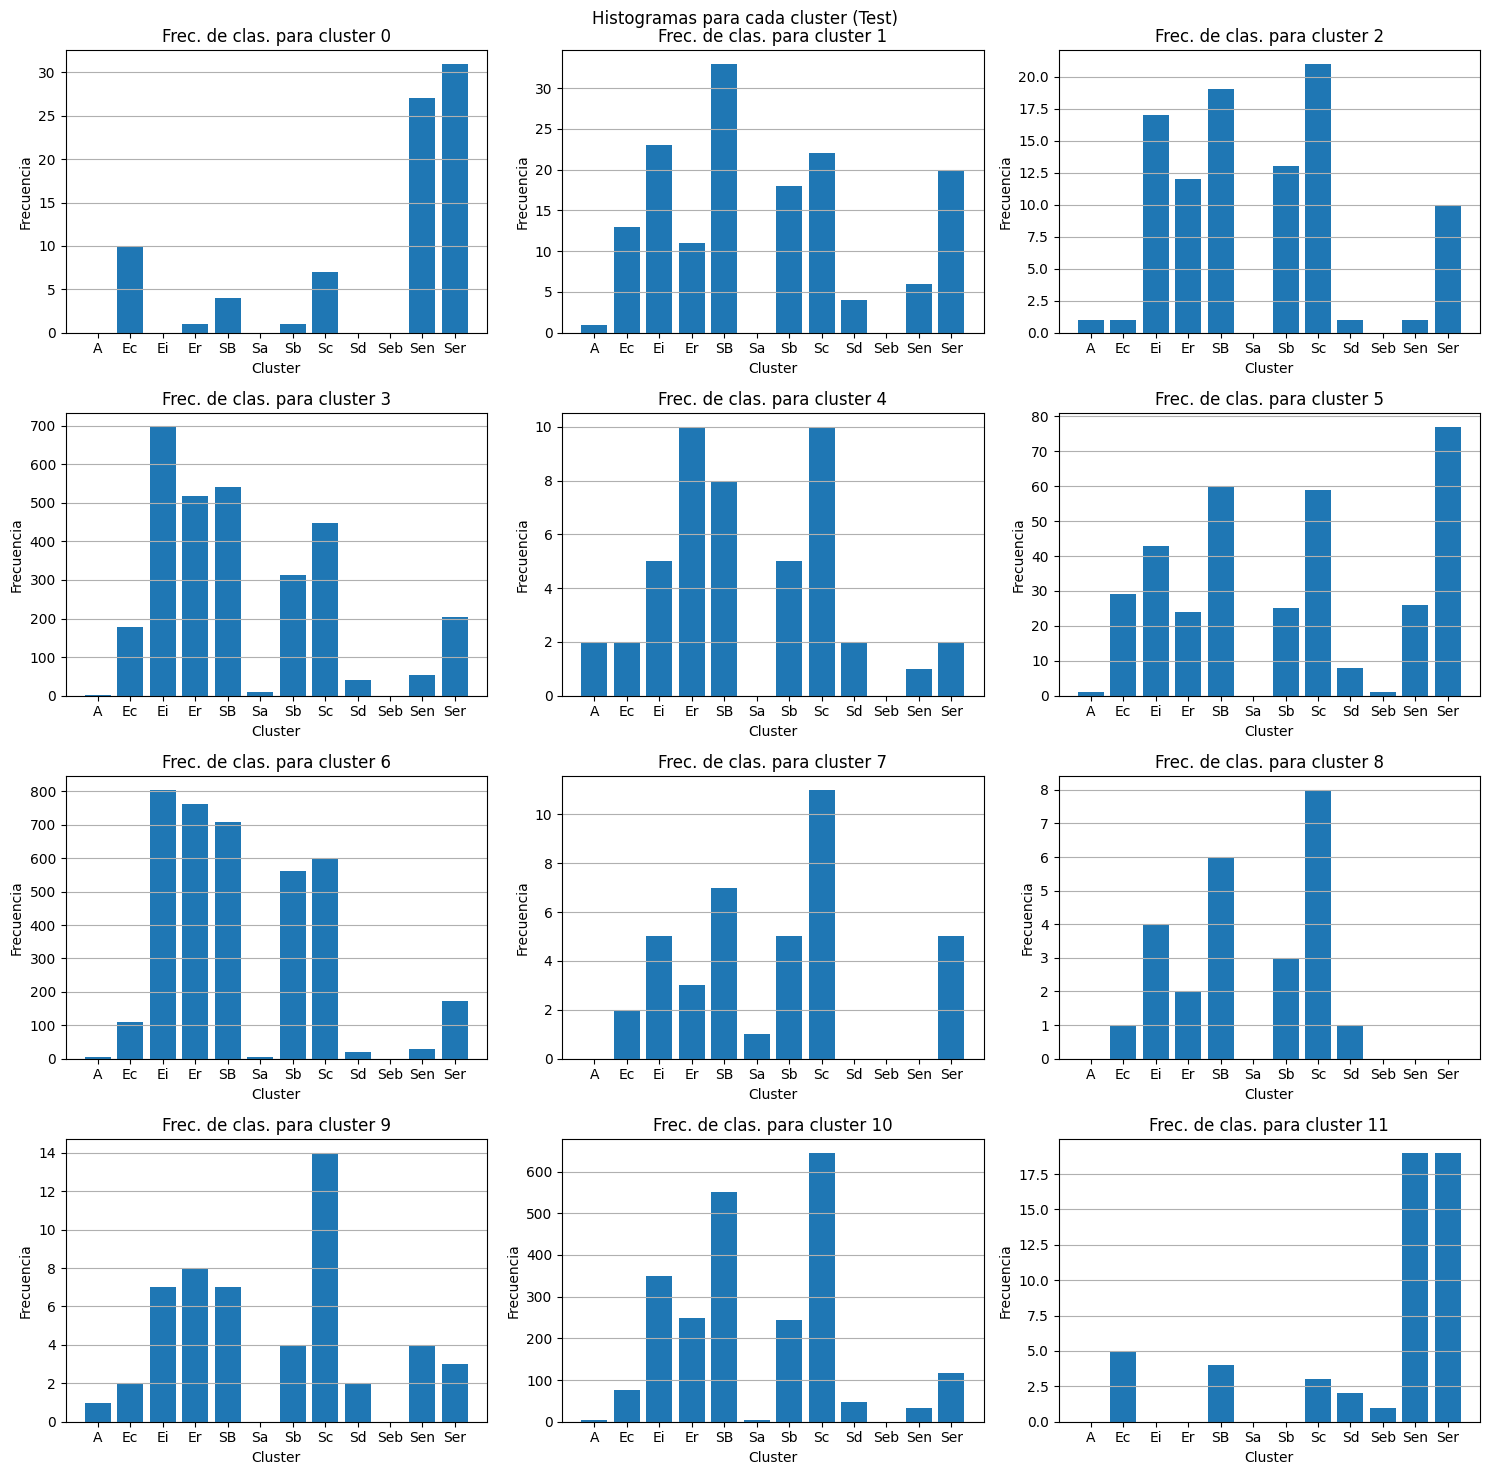

In [ ]:
# Generate histograms for each cluster showing the distribution of galaxy classes in the testing dataset
clusters_histograms(log_data_test,'Test')

## Histogram

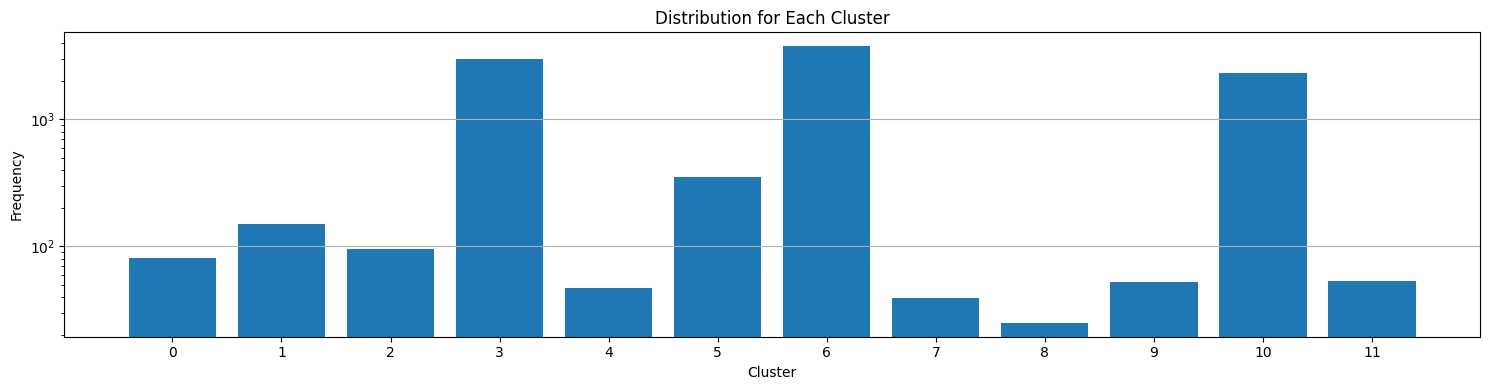

In [ ]:
# Plot and save a histogram showing the distribution of cluster labels in the testing data
histogram(labels,n_clusters,'Test_data_histograma_K-mean_')

In [ ]:
# Define the number of clusters for K-Means clustering
n_clusters = len(log_data_test['gz2_class'].unique())

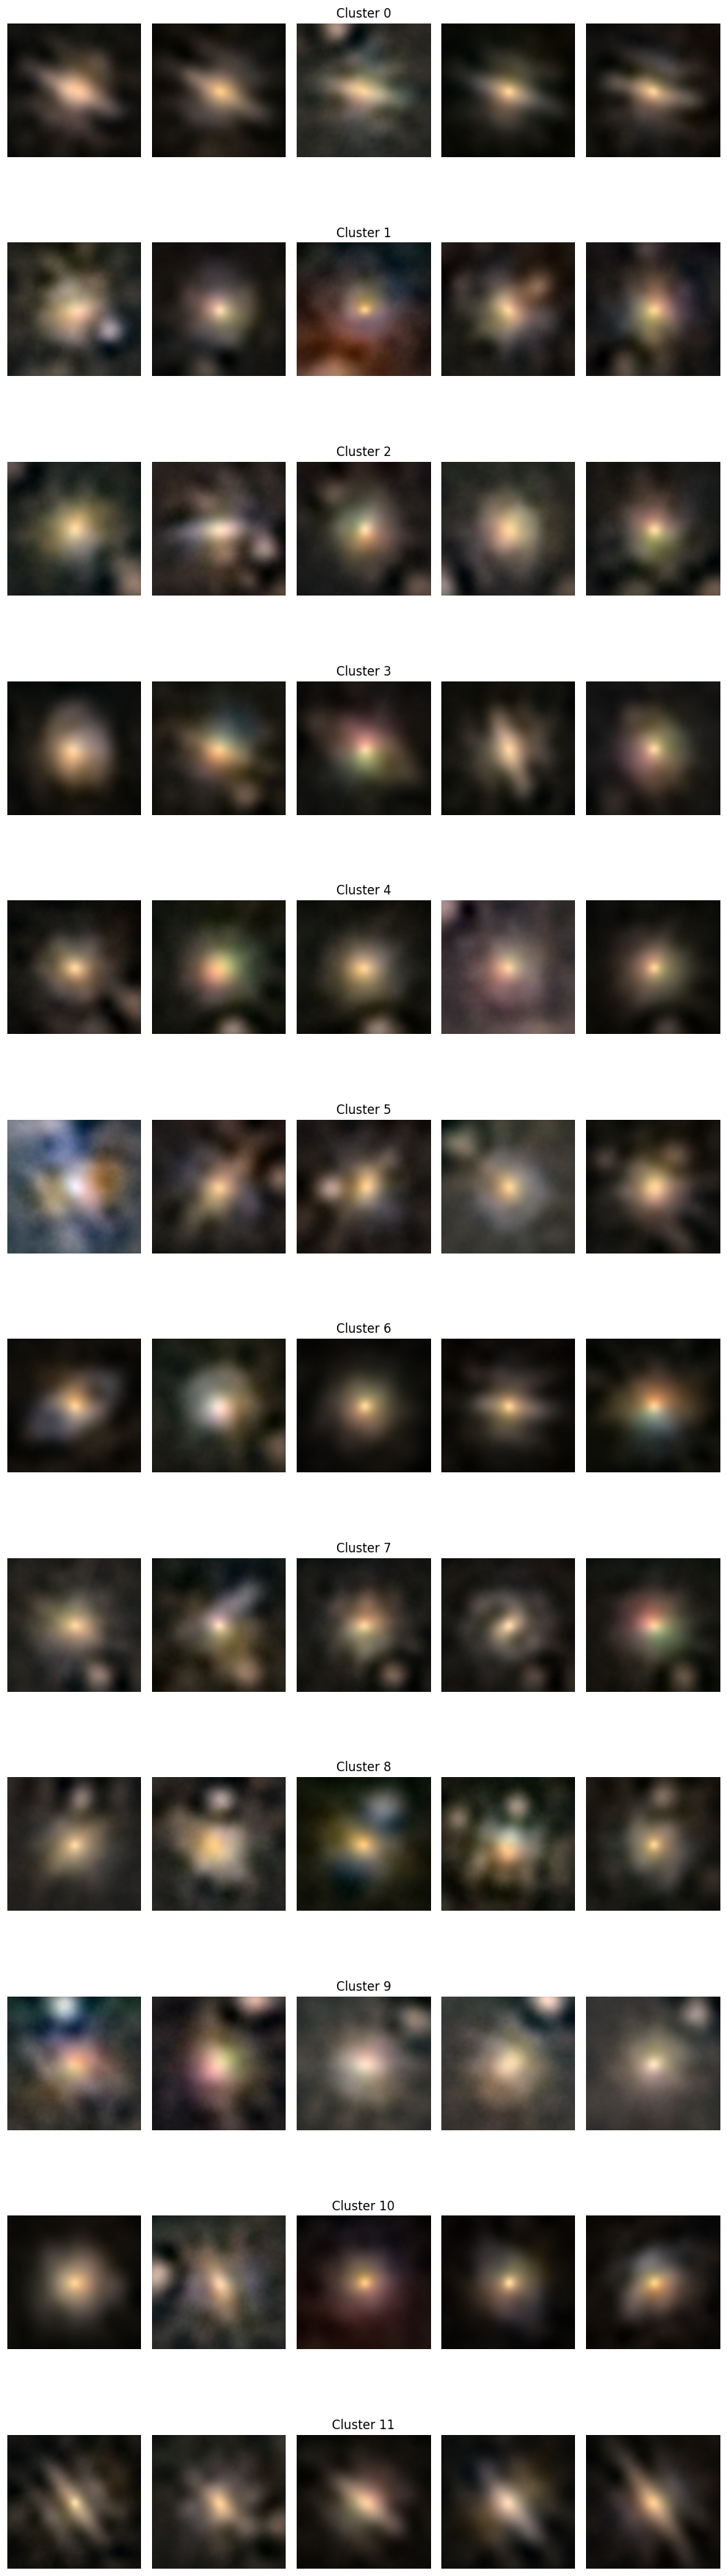

In [ ]:
# Get unique cluster labels from the test data predictions
etiquetas = np.unique(labels)

# Initialize plotting index
ploteo = 1

# Create a figure to display cluster samples
plt.figure(figsize=(10, 3 * n_clusters))

# Loop through each cluster label
for etq in etiquetas:
    cuenta = 0  # Counter for images per cluster

    # Iterate through all samples in the test data
    for i in range(len(labels)):
        rand = random.random()  # Generate a random number for sampling

        # Check if the sample belongs to the current cluster and add randomness to selection
        if etq == labels[i] and rand > 0.5:
            cuenta += 1  # Count images plotted for the cluster

            # Convert the PCA-transformed test sample back into an image
            img = single_reconverter(Test_data[i])

            # Plot the image in a subplot
            plt.subplot(n_clusters, 5, ploteo)
            plt.imshow(img)

            # Set a title for the first few images in the cluster
            if cuenta == 3:
                plt.title(f'Cluster {etq}')

            # Remove axes for better visualization
            plt.axis('off')

            # Increment the subplot index
            ploteo += 1

        # Limit to 5 images per cluster
        if cuenta == 5:
            break

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0.5)
plt.tight_layout()

# Save the figure as a PDF file in the results directory
plt.savefig(f'{root_result}Clusters_K-mean.pdf')
# Display the figure
plt.show()
